## Example ackermann_kinematic.py
### Author: Joshua A. Marshall <joshua.marshall@queensu.ca>
### GitHub: https://github.com/botprof/agv-examples


## SIMULATION SETUP

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from mobotpy.integration import rk_four
from mobotpy.models import Ackermann

# Set the simulation time [s] and the sample period [s]
SIM_TIME = 15.0
T = 0.1

# Create an array of time values [s]
t = np.arange(0.0, SIM_TIME, T)
N = np.size(t)

ModuleNotFoundError: No module named 'mobotpy'

## RUN SIMULATION

In [2]:
# Initialize arrays that will be populated with our inputs and states
x = np.zeros((4, N))
u = np.zeros((2, N))
phi_L = np.zeros(N)
phi_R = np.zeros(N)

# Set the wheelbase and track of the vehicle [m]
ELL_W = 2.50
ELL_T = 1.75

# Set the initial pose [m, m, rad, rad], velocities [m/s, rad/s]
x[0, 0] = 0.0
x[1, 0] = 0.0
x[2, 0] = np.pi / 2.0
x[3, 0] = 0.0
u[0, 0] = 5.0
u[1, 0] = 0

# Let's now use the class Ackermann for plotting
vehicle = Ackermann(ELL_W, ELL_T)

# Run the simulation
for k in range(1, N):
    x[:, k] = rk_four(vehicle.f, x[:, k - 1], u[:, k - 1], T)
    phi_L[k] = np.arctan(
        2 * ELL_W * np.tan(x[3, k]) / (2 * ELL_W - ELL_T * np.tan(x[3, k]))
    )
    phi_R[k] = np.arctan(
        2 * ELL_W * np.tan(x[3, k]) / (2 * ELL_W + ELL_T * np.tan(x[3, k]))
    )
    u[0, k] = 5.0
    u[1, k] = -0.25 * np.sin(2.0 * t[k])

## MAKE SOME PLOTS

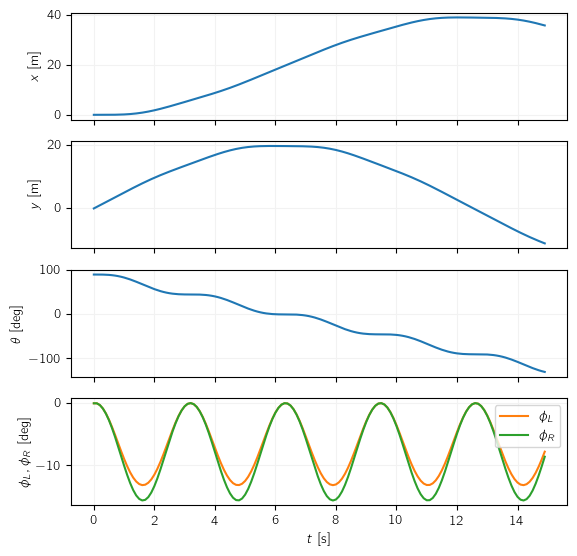

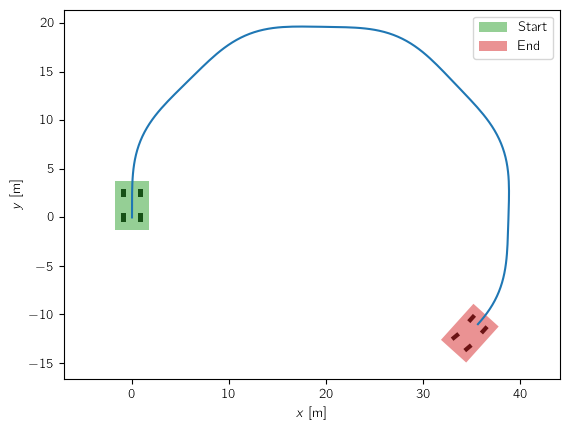

In [5]:
# Change some plot settings (optional)
plt.rc("text", usetex=True)
plt.rc("text.latex", preamble=r"\usepackage{cmbright,amsmath,bm}")
plt.rc("savefig", format="pdf")
plt.rc("savefig", bbox="tight")

# Plot the states as a function of time
fig1 = plt.figure(1)
fig1.set_figheight(6.4)
ax1a = plt.subplot(411)
plt.plot(t, x[0, :])
plt.grid(color="0.95")
plt.ylabel(r"$x$ [m]")
plt.setp(ax1a, xticklabels=[])
ax1b = plt.subplot(412)
plt.plot(t, x[1, :])
plt.grid(color="0.95")
plt.ylabel(r"$y$ [m]")
plt.setp(ax1b, xticklabels=[])
ax1c = plt.subplot(413)
plt.plot(t, x[2, :] * 180.0 / np.pi)
plt.grid(color="0.95")
plt.ylabel(r"$\theta$ [deg]")
plt.setp(ax1c, xticklabels=[])
ax1c = plt.subplot(414)
plt.plot(t, phi_L * 180.0 / np.pi, "C1", label=r"$\phi_L$")
plt.plot(t, phi_R * 180.0 / np.pi, "C2", label=r"$\phi_R$")
plt.grid(color="0.95")
plt.ylabel(r"$\phi_L,\phi_R$ [deg]")
plt.xlabel(r"$t$ [s]")
plt.legend()

# Save the plot
#plt.savefig("../agv-book/figs/ch3/ackermann_kinematic_fig1.pdf")

# Plot the position of the vehicle in the plane
fig2 = plt.figure(2)
plt.plot(x[0, :], x[1, :])
plt.axis("equal")
X_BL, Y_BL, X_BR, Y_BR, X_FL, Y_FL, X_FR, Y_FR, X_BD, Y_BD = vehicle.draw(
    x[0, 0], x[1, 0], x[2, 0], phi_L[0], phi_R[0]
)
plt.fill(X_BL, Y_BL, "k")
plt.fill(X_BR, Y_BR, "k")
plt.fill(X_FR, Y_FR, "k")
plt.fill(X_FL, Y_FL, "k")
plt.fill(X_BD, Y_BD, "C2", alpha=0.5, label="Start")
X_BL, Y_BL, X_BR, Y_BR, X_FL, Y_FL, X_FR, Y_FR, X_BD, Y_BD = vehicle.draw(
    x[0, N - 1], x[1, N - 1], x[2, N - 1], phi_L[N - 1], phi_R[N - 1]
)
plt.fill(X_BL, Y_BL, "k")
plt.fill(X_BR, Y_BR, "k")
plt.fill(X_FR, Y_FR, "k")
plt.fill(X_FL, Y_FL, "k")
plt.fill(X_BD, Y_BD, "C3", alpha=0.5, label="End")
plt.xlabel(r"$x$ [m]")
plt.ylabel(r"$y$ [m]")
plt.legend()

# Save the plot
#plt.savefig("../agv-book/figs/ch3/ackermann_kinematic_fig2.pdf")

# Show all the plots to the screen
plt.show()

## MAKE AN ANIMATION

In [ ]:
# Create and save the animation
ani = vehicle.animate(
    x,
    T,
    phi_L,
    phi_R,
    True,
    "../agv-book/gifs/ch3/ackermann_kinematic.gif",
)

# Show the movie to the screen
plt.show()

# # Show animation in HTML output if you are using IPython or Jupyter notebooks
# plt.rc('animation', html='jshtml')
# display(ani)
# plt.close()